# PCA 실습 2. Wine dataset

> 와인 색상 분류 : Red / White

</br>

## --▶ Dataset Load

In [1]:
import pandas as pd

wine = pd.read_csv("../dataset/wine.csv", sep=',', index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## --▶ Features / Label 분리

In [2]:
wine_X = wine.drop(columns="color")
wine_y = wine['color']

wine_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## --▶ StandardScaler 적용

In [4]:
from sklearn.preprocessing import StandardScaler

wine_ss = StandardScaler().fit_transform(wine_X)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

## --▶ PCA

- Wine 데이터 12개의 Features를 2개의 주성분 특성으로 나타내본다.

In [21]:
from Ch09_PCA_utility import *

pca_wine, pca = get_pca_data(wine_ss, n_components=2)
pca_wine.shape

(6497, 2)

In [22]:
def print_variances_ratio(pca):
    print('variance_ratio:', pca.explained_variance_ratio_)
    print('Sum of variance_ratio:', sum(pca.explained_variance_ratio_))
    
print_variances_ratio(pca)

variance_ratio: [0.25346226 0.22082117]
Sum of variance_ratio: 0.47428342743236157


👉 설명력 50% 미만

- 두 개의 주성분으로 줄이는 건 데이터에 대한 설명력이 50%가 안된다.

In [23]:
pca_wine_pd = get_pd_from_pca(pca_wine)
pca_wine_pd['color'] = wine_y.values
pca_wine_pd.head()

,pca_component_1,pca_component_2,color
0,-3.348438,0.568926,1
1,-3.228595,1.197335,1
2,-3.237468,0.952580,1
3,-1.672561,1.600583,1
4,-3.348438,0.568926,1


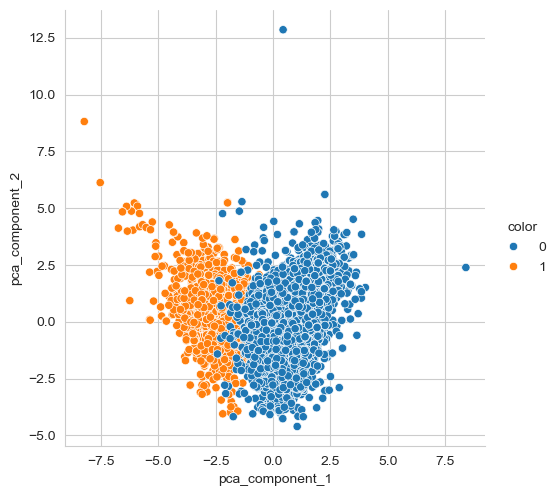

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore', category=UserWarning)

sns.set_style('whitegrid')

#, palette='Set2'
sns.pairplot(
	pca_wine_pd, hue='color', height=5,
	x_vars=['pca_component_1'],
	y_vars=['pca_component_2']
);

## --▶ Random Forest Modeling

#### ◾ Original 12 Features

In [27]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(n_estimators=100, random_state=13)
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)
    
    print('Score :', np.mean(scores_rf))

rf_scores(wine_ss, wine_y)

Score : 0.9935352638124


#### ◾ PCA 2 Features

In [29]:
pca_X = pca_wine_pd[['pca_component_1','pca_component_2']]

rf_scores(pca_X, wine_y) #--> 원 데이터와 큰 차이가 없다.

Score : 0.981067803635933


#### ◾ PCA 3 Features

In [32]:
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print_variances_ratio(pca)

cols = ['pca_1', 'pca_2', 'pca_3']
pca_wine_pd = get_pd_from_pca(pca_wine, cols=cols)
pca_wine_pd['color'] = wine_y.values
display(pca_wine_pd)

pca_X = pca_wine_pd[cols]
rf_scores(pca_X, wine_y)

variance_ratio: [0.25346226 0.22082117 0.13679223]
Sum of variance_ratio: 0.61107566218387


,pca_1,pca_2,pca_3,color
0,-3.348438,0.568926,-2.727386,1
1,-3.228595,1.197335,-1.998904,1
2,-3.237468,0.952580,-1.746578,1
3,-1.672561,1.600583,2.856552,1
4,-3.348438,0.568926,-2.727386,1
...,...,...,...,...
6492,0.112718,-1.912247,-0.061138,0
6493,1.720296,1.009571,-0.662488,0
6494,0.626922,-0.622145,-0.149483,0
6495,0.491934,-3.755928,-0.080284,0


Score : 0.9832236631728548


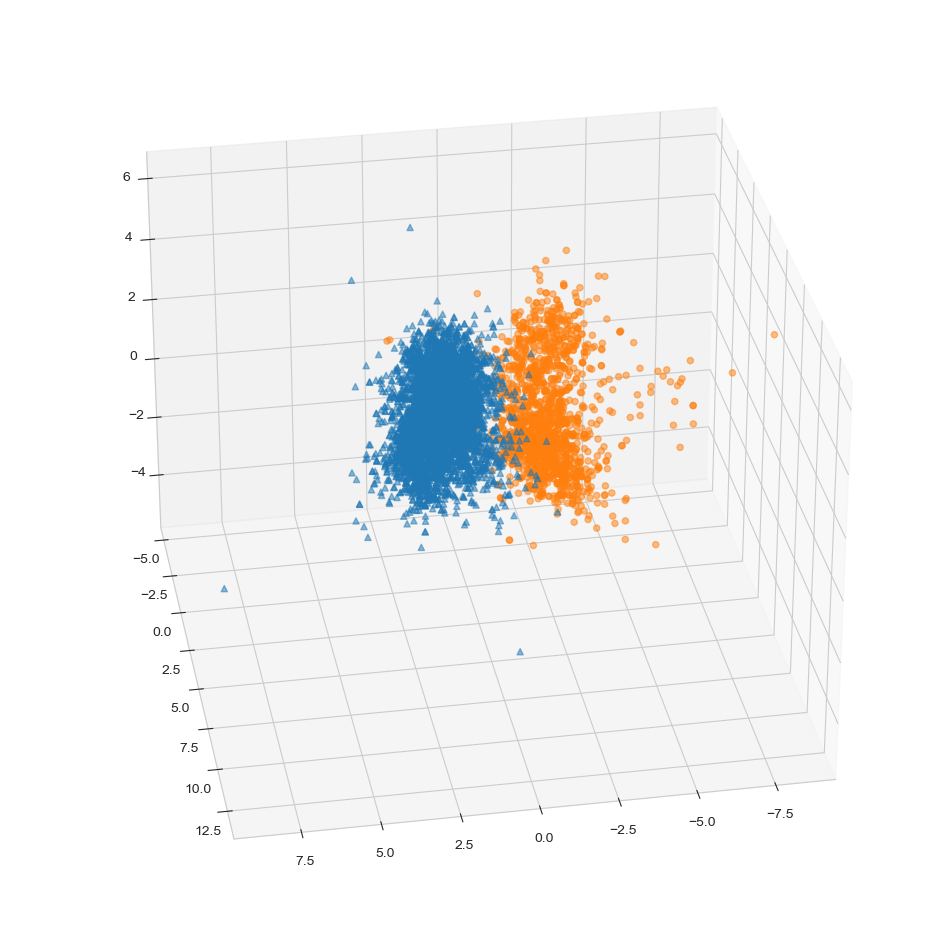

In [33]:
from mpl_toolkits.mplot3d import Axes3D

markers = ['^', 'o']

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

for i, marker in enumerate(markers):
    x_axis_data = pca_wine_pd[pca_wine_pd['color']==i]['pca_1']
    y_axis_data = pca_wine_pd[pca_wine_pd['color']==i]['pca_2']
    z_axis_data = pca_wine_pd[pca_wine_pd['color']==i]['pca_3']
    
    ax.scatter(
		x_axis_data, y_axis_data, z_axis_data,
		s=20, alpha=0.5, marker=marker
	)

ax.view_init(30,80)
plt.show()

In [34]:
import plotly.express as px

fig = px.scatter_3d(
	pca_wine_pd, x='pca_1', y='pca_2', z='pca_3', color='color', symbol='color', opacity=0.4
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0)) # left, right, bottom, top = 0
fig.show()